In [1]:
import sys, os
modules_path = os.path.abspath('../modules')
if modules_path not in sys.path:
    sys.path.append(modules_path)

import numpy as np
from array import array
import matplotlib.pyplot as plt
from binding import ConcentrationSweep
from partitions import PartitionFunction, Microstates
from time import time

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [407]:
# parameters (energies in kcal/mole, ordered Pnt-Yan)
a0, b0, c0 = -9.955, -5.837, -7.043

# a0, b0, c0 = -10, -6, -7
alpha = [1.25*(b0+c0), a0] 
beta = [.95*(b0+c0), 0] 
gamma = [0, b0+c0] 

# alpha = [a0*2, a0*2] 
# beta = [b0*2, b0*2] 
# gamma = [c0*0, c0*0] 

params = dict(alpha=alpha, beta=beta, gamma=gamma)

R, T = 1.987204118*1E-3, 300
Ka = np.exp(-np.array(alpha)/(R*T))
Kb = np.exp(-np.array(beta)/(R*T))
Kg = np.exp(-np.array(gamma)/(R*T))
print('alpha ratio', Ka[0]/Ka[1])
print('beta ratio', Kb[0]/Kb[1])
print('gamma ratio', Kg[0]/Kg[1])

alpha ratio 29959.872262
beta ratio 819863831.728
gamma ratio 4.14108333756e-10


In [412]:
#%%prun -D runtime.prof
start = time()
microstates = Microstates(Ns=10, N_species=2, params=params, ets=(0, ))
sweep = ConcentrationSweep(cmin=0, cmax=100, density=25)
sweep.set_occupancies(microstates, method='c')
print(time()-start)

1.8516950607299805


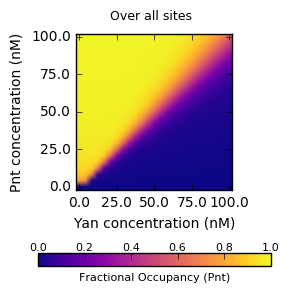

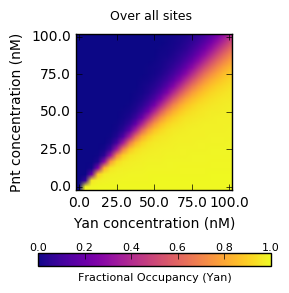

In [413]:
#fig = sweep.plot_site_occupancy(site=0, species='Pnt')
fig = sweep.plot_overall_occupancy(species='Pnt', figsize=(3, 3))
fig = sweep.plot_overall_occupancy(species='Yan', figsize=(3, 3))
#fig = sweep.plot_overall_occupancy(species='Yan')
#fig = sweep.plot_overall_occupancy(species='total')

#""" compare without polym. (equiv to simple model) against with polym """

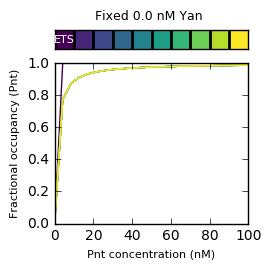

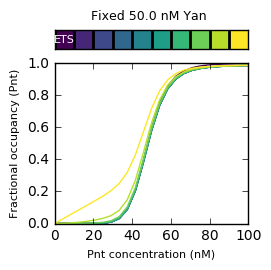

In [414]:
sweep.plot_contours(species='Pnt', variable='Pnt', fixed=0, figsize=(2.5, 2.5))
sweep.plot_contours(species='Pnt', variable='Pnt', fixed=12, figsize=(2.5, 2.5))

In [210]:
times = []
N_range = range(1, 13)
for N_sites in N_range:
    start = time()
    microstates = Microstates(Ns=N_sites, N_species=2, params=params)
    sweep = ConcentrationSweep(cmin=0, cmax=100, density=10)
    sweep.set_occupancies(microstates, method='c')
    times.append(time()-start)

KeyboardInterrupt: 

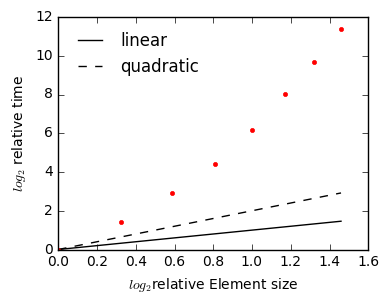

In [11]:
_ = plot_time_complexity(N_range, times, ind=3, quantity='Element size')

In [10]:
def plot_time_complexity(sizes, times, ind=1, quantity='network size', color='r', fig=None, label=None):
    """ Plot time complexity. """
    s, t = np.array(sizes[ind:]), np.array(times[ind:])
    if fig is None:
        fig, ax = plt.subplots(figsize=(4, 3))
        ax.plot([0, np.log2(s[-1]/s[0])], [0, np.log2(s[-1]/s[0])], '-k', label='linear')
        ax.plot([0, np.log2(s[-1]/s[0])], [0, 2*np.log2(s[-1]/s[0])], '--k', label='quadratic')
    else:
        ax = fig.axes[0]

    ax.plot(np.log2(s/s[0]), np.log2(t/t[0]), '.', color=color, label=label)
    ax.set_xlabel(r'$log_2$' + 'relative {:s}'.format(quantity))
    ax.set_ylabel(r'$log_2$ relative time')
    ax.legend(loc=0, frameon=False)
    return fig

In [118]:
# parameters (energies in kcal/mole, ordered Pnt-Yan)
a0, b0, c0 = -1, -1, -1
alpha = [a0*1, a0*0] 
beta = [b0*0, b0*0] 
gamma = [c0*0, c0*0] 

params = dict(alpha=alpha, beta=beta, gamma=gamma)

In [187]:
from partitions import get_ternary_repr, bits_to_int, get_ternary_dim
str_to_array = lambda x: array('I', [int(v) for v in x])

In [188]:
n = 6
microstates = Microstates(Ns=n, params=params, ets=(0,-2))
cms = microstates.get_c_microstates()
energies = cms.get_E()
G = cms.get_G()

In [192]:
pf = PartitionFunction(microstates, sweep.C)
probabilities = pf.preallocate_probabilities()

In [196]:
probabilities.shape

(625, 729)

In [ ]:
# need separate alpha, beta, gamma effects for each microstate

In [190]:
energies.shape

(729,)

In [150]:
microstates.ets

array('I', [1, 0, 0, 0, 1, 0])

In [151]:
x1 = '111000'
arr1 = str_to_array(x1)
k1 = bits_to_int(arr1, n)

x2 = '000111'
arr2 = str_to_array(x2)
k2 = bits_to_int(arr2, n)

print(k1, k2)

13 351


In [152]:
G[k1]

-1.0

In [153]:
G[k2]

0.0

In [154]:
get_ternary_repr(k2)

(5, array('i', [0, 0, 0, 1, 1, 1]))

In [136]:
'abcdef'[-2]

'e'

In [97]:
get_ternary_repr(k)

NameError: name 'k' is not defined

In [21]:
get_ternary_dim(k)

9

In [22]:
k // (3**10)

0

In [ ]:
np.flo

In [ ]:
min_float = np.finfo(np.float64).min
max_float = np.finfo(np.float64).max
max_float

In [67]:
min_float

-1.7976931348623157e+308

In [85]:
k2

1756792528

In [61]:
int_to_array(x1)

array('I', [1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [31]:
min_int = np.iinfo(np.uint64).min
max_int = np.iinfo(np.uint64).max

In [32]:
3**24

282429536481

In [34]:
n = 48
max_int > (3**n)

False

In [194]:
c

array([  5.00000000e-01,   5.00000000e-01,   5.91147561e-12,
         5.91147561e-12,   5.91147561e-12,   5.91147561e-12])

In [415]:
cms = microstates.get_c_microstates()
a,b,g = cms.get_energy_contributions()
pf = PartitionFunction(microstates, sweep.C)
probabilities = pf.preallocate_probabilities()
R = 1.987204118*1E-3
T = 300
gc = np.vstack((a,b,g))
#ec = np.exp(-gc/(R*T))
ec = -gc
contrib = np.dot(probabilities, ec.T)
contrib = contrib / contrib.sum(axis=1).reshape(-1, 1)
contrib = contrib.reshape((sweep.density, sweep.density, 6))
binding = contrib[:,:,:4].sum(axis=-1)
polymerization = 1 - binding

In [416]:
a_contrib = contrib[:,:,:2].sum(axis=-1).mean()
b_contrib = contrib[:,:,2:4].sum(axis=-1).mean()
g_contrib = contrib[:,:,4:].sum(axis=-1).mean()
print(a_contrib, b_contrib, g_contrib)

0.00160490033652 0.52394369931 0.474451400354


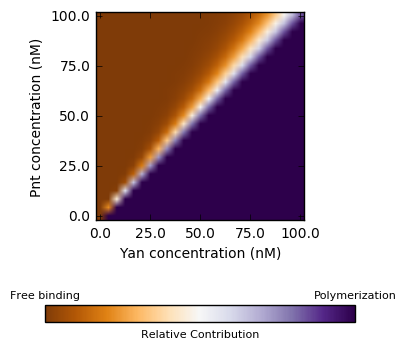

In [417]:
# create figure
cmap = plt.cm.PuOr
figsize = (4,4)
name = 'Polymerization'
from matplotlib import gridspec
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

fig = plt.figure(figsize=figsize)
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=(12, 1), hspace=0.75)

# visualize occupancy
ax = plt.subplot(gs[0])
ax.imshow(polymerization, cmap=cmap, vmin=0, vmax=.5)
ax.invert_yaxis()
ax.set_xlabel('Yan concentration (nM)')
ax.set_ylabel('Pnt concentration (nM)')
ax.set_aspect(1)
sweep.format_ticks(ax)

# add colorbar
ax_cbar = plt.subplot(gs[1])
norm = Normalize(0, 0.5)
cbar = ColorbarBase(ax_cbar, cmap=cmap, norm=norm, orientation='horizontal')
ax_cbar.xaxis.set_ticks_position('top')
ax_cbar.tick_params(labelsize=8, pad=0)
label = 'Relative Contribution'
# if name is not None:
#     label = label + ' ({:s})'.format(name)
cbar.set_label(label, fontsize=8)
cbar.set_ticks([0, .5])
cbar.set_ticklabels(['Free binding', 'Polymerization'])
ax_cbar.tick_params(pad=3)

AttributeError: 'AxesSubplot' object has no attribute 'st'

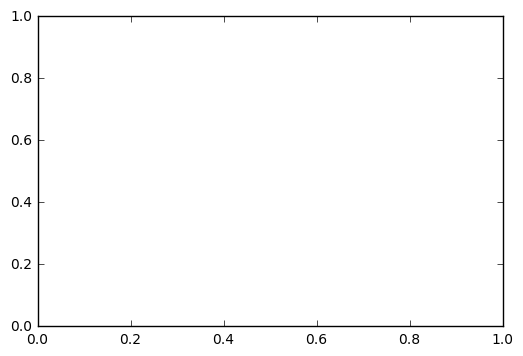

In [67]:
fig, ax = plt.subplots()
ax.stackplot()

In [35]:
p.shape

(59049,)

In [40]:
(p*ae).sum(axis=1)

array([  4.78246894e+04,   4.04366257e+15])

In [41]:
(p*be).sum(axis=1)

array([  1.00000000e+00,   9.27327960e+34])

In [42]:
(p*ge).sum(axis=1)

array([  1.00000000e+00,   7.84345290e+45])